### Omówienie problemu

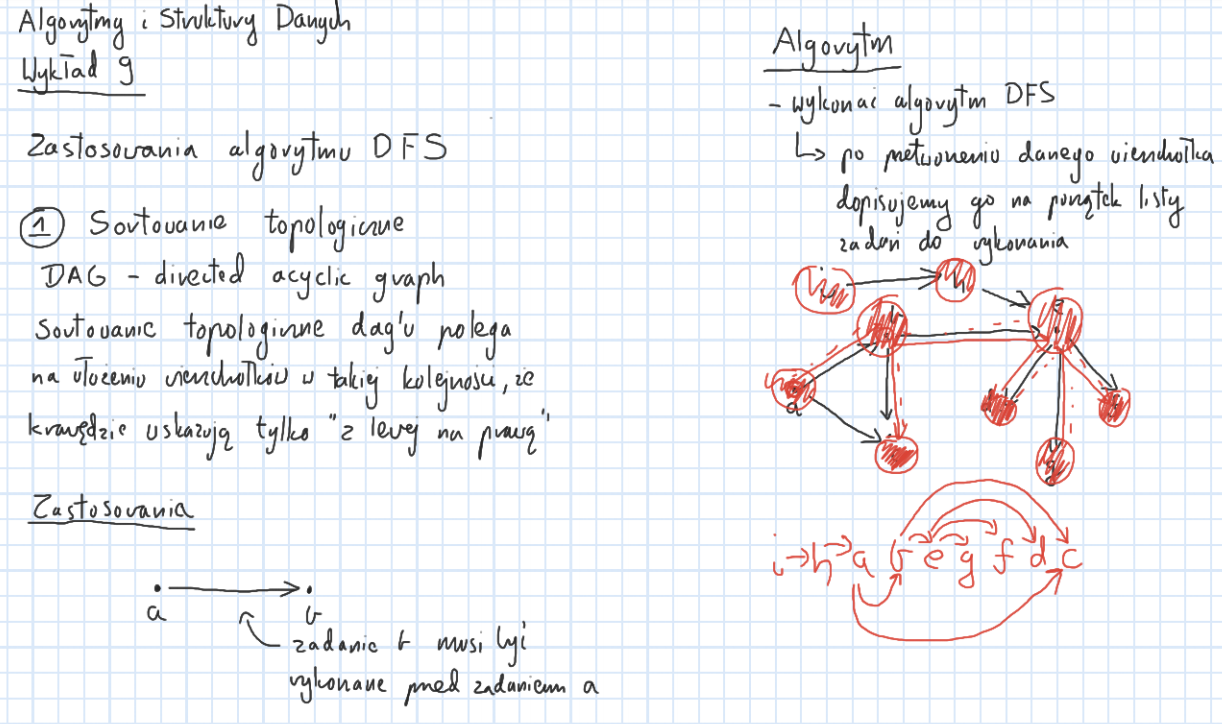

### Implementacja

In [1]:
def topological_sort(G: 'graph represented using adjacency lists'):
    n = len(G)
    visited = [False] * n
    result = [None] * n
    idx = n
    
    def dfs(u):
        visited[u] = True
        for v in G[u]:
            if not visited[v]:
                dfs(v)
        nonlocal idx
        idx -= 1
        result[idx] = u
        
    for u in range(n):
        if not visited[u]:
            dfs(u)
            
    return result
    

def directed_graph_list(E: 'array of edges', n: 'number of vertices'):
    G = [[] for _ in range(n)]
    for edge in E:
        G[edge[0]].append(edge[1])
    return G

###### Kilka testów

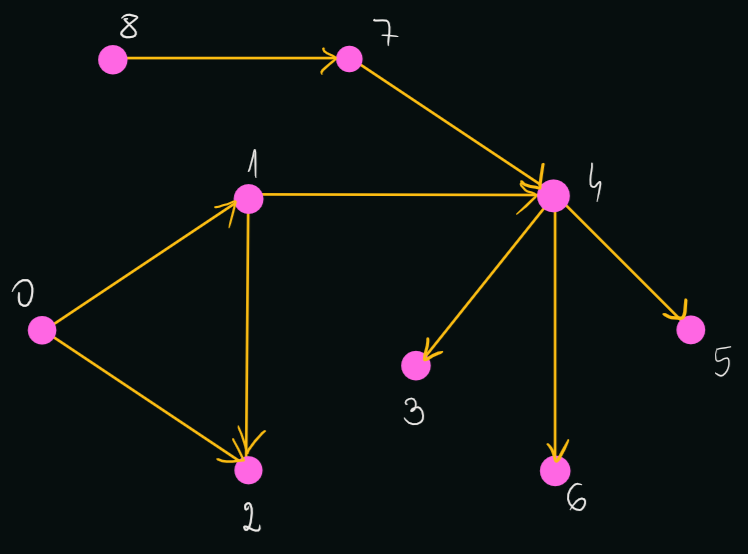

In [2]:
E = [(0, 1), (0, 2), (1, 2), (1, 4), (4, 3), (4, 6), (4, 5), (7, 4), (8, 7)]

G = directed_graph_list(E, 9)
print(topological_sort(G))

[8, 7, 0, 1, 4, 5, 6, 3, 2]


### (Dodatkowo) Implementacja z nazwami wierzchołków w postaci kolejnych liter języka angielskiego

W poniższej implementacji używam dynamicznej tablicy do zapisywania wyników. Ponieważ wyniki będą zapisane w odwrotnej kolejności, jeżeli będziemy je dodawać na koniec tablicy, musimy później odwrócić kolejność elementów. Można równie dobrze skorzystać z tablicy o stałym rozmiarze, jak to zostało pokazane w algorytmie wyżej.

In [3]:
def topological_sort(G: 'graph represented using adjacency lists'):
    n = len(G)
    visited = [False] * n
    result = []
    
    def dfs(u):
        visited[u] = True
        for v in G[u]:
            v = ord(v) - ord('a')
            if not visited[v]:
                dfs(v)
        result.append(chr(ord('a') + u))
        
    for u in range(n):
        if not visited[u]:
            dfs(u)
            
    # Reverse a result array
    for i in range(n // 2):
        swap(result, i, n - i - 1)
            
    return result
    

def swap(A, i, j):
    A[i], A[j] = A[j], A[i]
    

def directed_graph_list(E: 'array of edges', n: 'number of vertices'):
    G = [[] for _ in range(n)]
    for edge in E:
        G[ord(edge[0]) - ord('a')].append(edge[1])
    return G

###### Kilka testów

In [4]:
E = [('a', 'b'), ('a', 'c'), ('b', 'c'), ('b', 'e'), ('e', 'd'),
     ('e', 'g'), ('e', 'f'), ('h', 'e'), ('i', 'h')]

G = directed_graph_list(E, 9)
print(topological_sort(G))

['i', 'h', 'a', 'b', 'e', 'f', 'g', 'd', 'c']
